# Exploring California Housing - Analysis

## This EDA uses the california housing dataset from scikit-learn. I am analyzing it in order to get used to and learn the process of a typical exploratory data analysis. I will also be implementing machine learning concepts to conduct regression and predict housing prices. 
- Data obtained from Statlib repository
- Target variable is the median house value for CA disctrics, given in hundred-thousands of dollars
- Dataset is from the 1990 census. One row per census block group
- Household = group of people residing in a home


In [15]:
# imports

from sklearn.datasets import fetch_california_housing
import pandas as pd

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# A - Data Overview

In [19]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [7]:
df.shape

(20640, 9)

#### The shape tells us we have approximately 20,000 total data entries along with 9 columns. It's a good way to figure out the magnitude of data without manually checking the file.

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### First 5 rows
- We see the names of all the columns
- Note: All these values are per block group, which explains why the columns are averages and medians


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### From this, we confirm the number of columns (9). We also now know that all data is the float datatype. This will make certain types of graphs/modeling easier since there are no objects or categories, just numerical data,

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### This shows the stat spread of the data.
- All rows have the same count, meaning that there are either no missing values, or every column is missing the same amount of values. Since the shape earlier told us that we had 20,640 total entries, we know that it's the former
- We are also given the min, max, std and other stats
- Want look at the min and max values for median house val later to see if they're significant

# B - Missing Values

In [11]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [12]:
df.isnull().mean()

MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
dtype: float64

#### I already discussed that there were no missing values, but determinedd it was good to confirm anyway. Checking for missing values is standard

# C - Plots/Feature Understanding
- The following plots will be done for all columns:
    - Histogram, KDE, Boxplot

In [17]:
# imports for graphs

import matplotlib.pylab as plt
import seaborn as sns

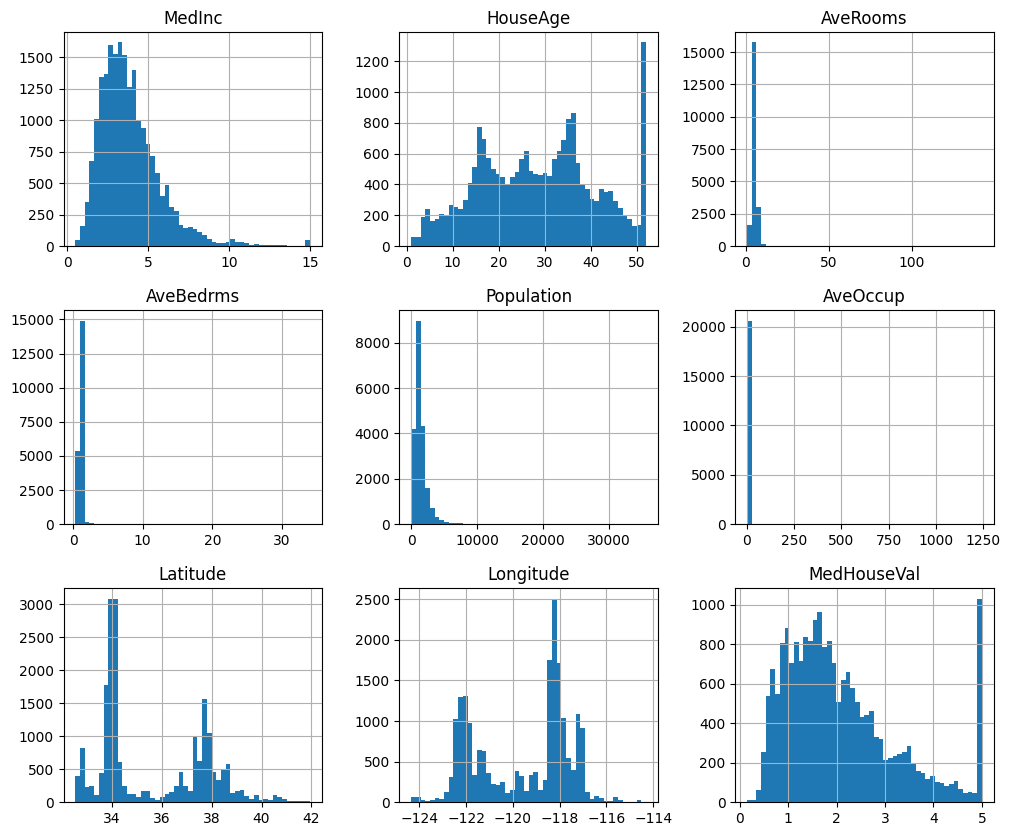

In [18]:
df.hist(figsize=(12, 10), bins=50)
plt.show()

#### This gives us a histogram of all the columns. I will spotlight some noteworthy ones with kde graphs and we'll see if we can gleam something interesting from them.

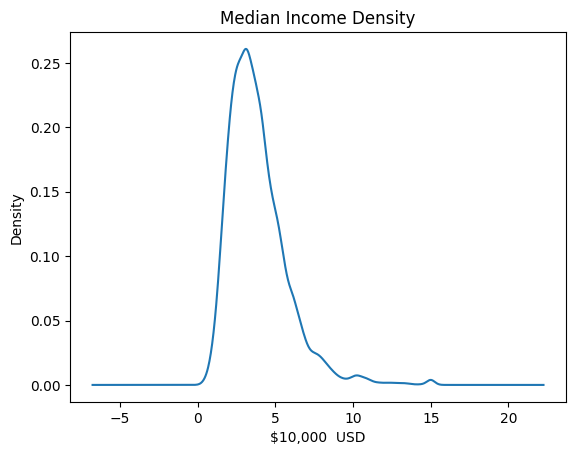

In [50]:
ax = df['MedInc'].plot(kind='kde', title='Median Income Density')
ax.set_xlabel("$10,000  USD")
plt.show()

#### Notes:
- Average mean income is around $30k USD. This matches up with what was seen earlier from the describe() function. 
- Right around the $40k USD mark, there is a very steep dropoff
- Very little people made over $100,000 USD which makes sense given that the data is from 1990

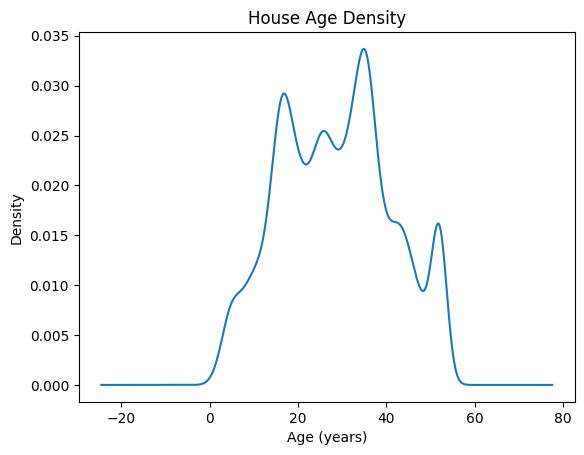

In [49]:
ax = df['HouseAge'].plot(kind='kde', title='House Age Density')
ax.set_xlabel("Age (years)")
plt.show()

#### Notes:
- There are two common peaks of housing age at around 18 years and 35 years
- There a seems to be a massive amount of houses that are aged 52. I suspect that this is due to a cap in the census that made every house older than 52 years labeled as 52

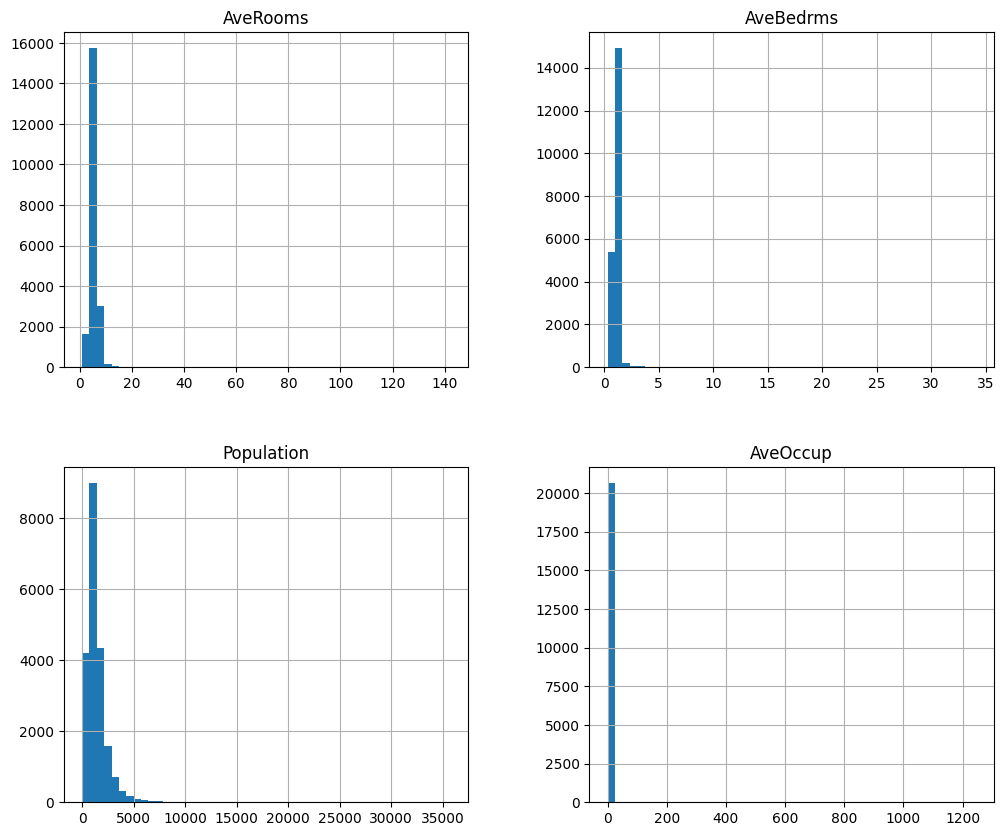

In [46]:
grouped_df = df[["AveRooms", "AveBedrms", "Population", "AveOccup"]]
grouped_df.hist(figsize=(12, 10), bins=50)
plt.show()

#### I grouped these 4 columns together because they all have an extremely similar distribution. There may be a correlation here to observe
- left as a histogram for simple viewing

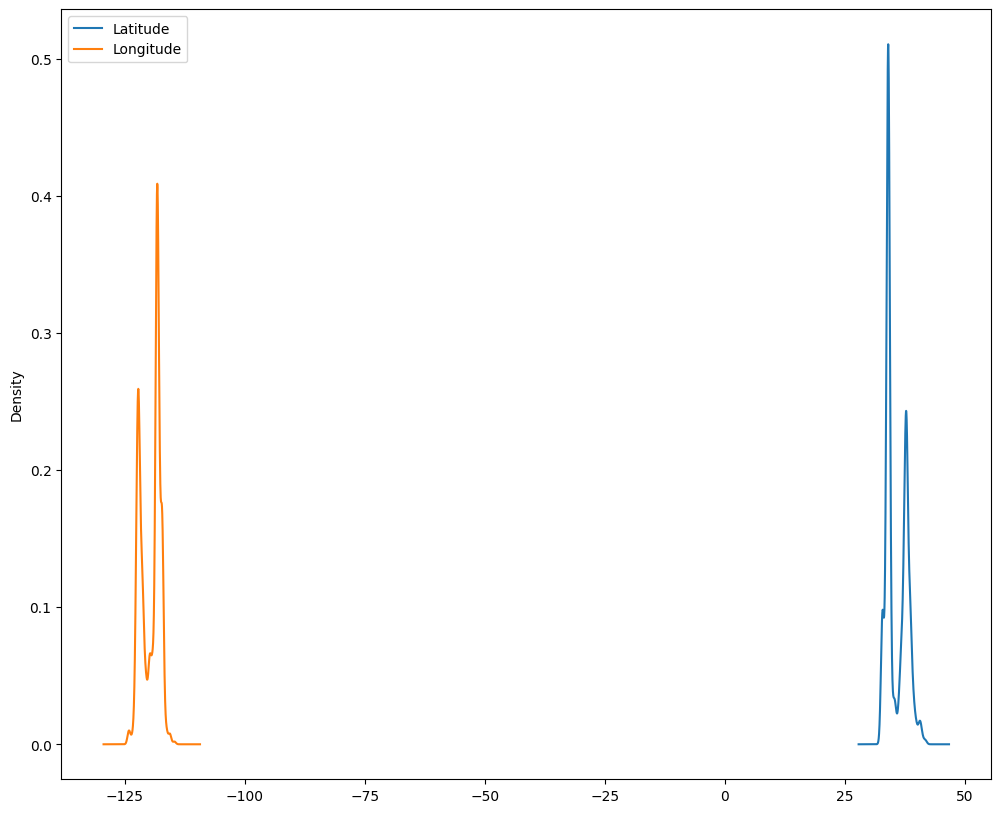

In [44]:
grouped_df = df[["Latitude", "Longitude"]]
grouped_df.plot.kde(figsize=(12, 10))
plt.show()

#### I also grouped these together since their distributions are extremely similar. They look like mirrors of each other at certain points.
- This is likely due to the curve of California's coast once we get to Southern CA

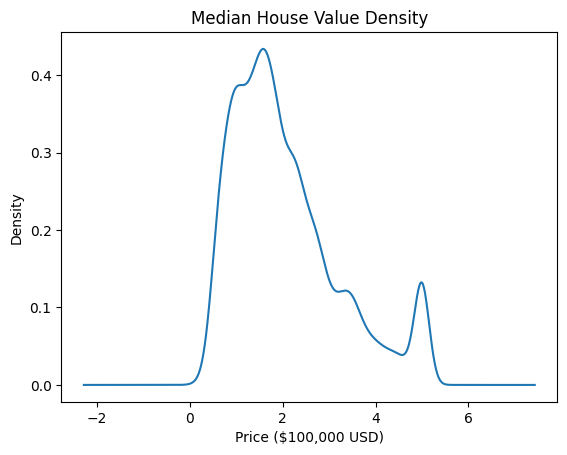

In [48]:
ax = df['MedHouseVal'].plot(kind='kde', title='Median House Value Density')
ax.set_xlabel("Price ($100,000 USD)")
plt.show()

#### The target column
- Huge peak around $190-200,000. This is where most of the density is for homes around that time
- I theorize that the steep dropoff then break again at $500,000 is another census cutoff, thus the cause for the extra density

#### Finally, we will use boxplots to visualize the info from deescribe() all one graph

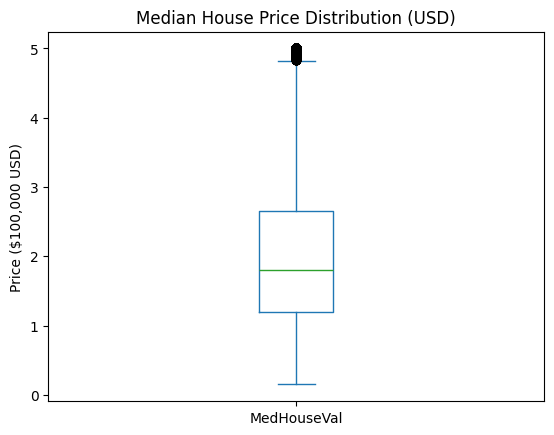

In [53]:
# starting with the target column
ax = df['MedHouseVal'].plot(kind='box', title='Median House Price Distribution (USD)')
ax.set_ylabel("Price ($100,000 USD)")
plt.show()

#### This does a great job at visually showing us exactly where the min, max, median, and upper/lower quartiles are

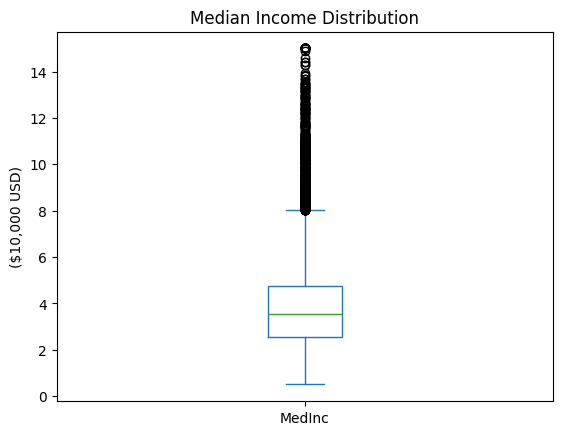

In [56]:
ax = df['MedInc'].plot(kind='box', title='Median Income Distribution')
ax.set_ylabel("($10,000 USD)")
plt.show()

#### Decent amount of outliers here, did not honestly expect so many. In hindsight, it makes sense and explains why some people were able to afford certain houses within these blocks. It's interesting to see it visualized.

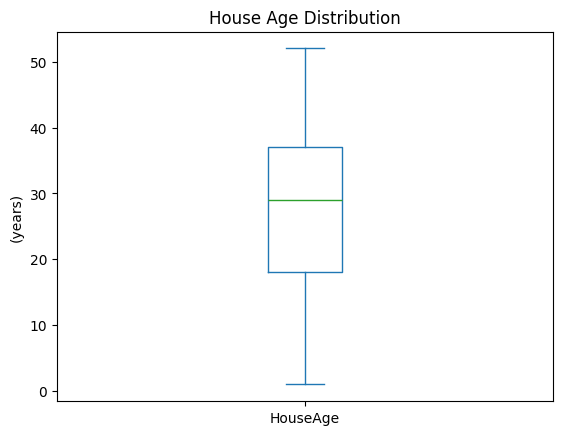

In [57]:
ax = df['HouseAge'].plot(kind='box', title='House Age Distribution')
ax.set_ylabel("(years)")
plt.show()

#### Just as interesting, we see no outliers for age. The distribution is normal. This makes me think that there was no cap on age to begin with like I had preivously thought

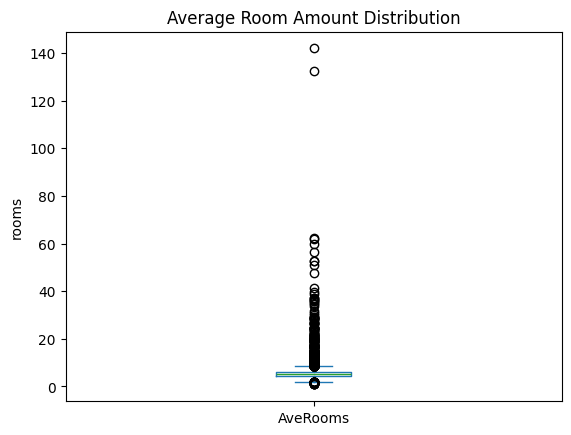

In [58]:
ax = df['AveRooms'].plot(kind='box', title='Average Room Amount Distribution')
ax.set_ylabel("rooms")
plt.show()

#### This one has so many outliers, with such an extreme difference of room number per block, that it's near impossible to see the normal distribution. You could also say thaty the normal distribution is tiny compared to the range of the outliers

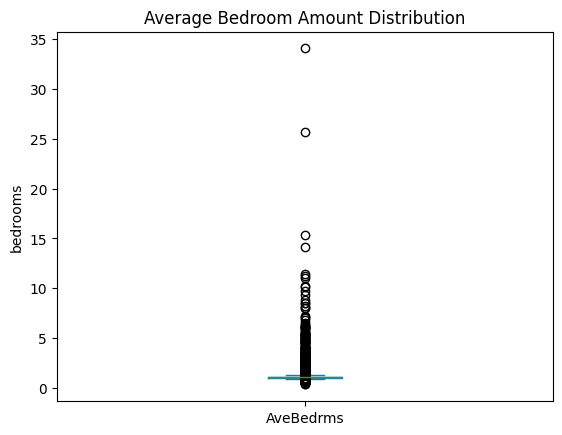

In [59]:
ax = df['AveBedrms'].plot(kind='box', title='Average Bedroom Amount Distribution')
ax.set_ylabel("bedrooms")
plt.show()

#### It's the exact same story for bedrooms. I'm curious to see if population and occup will follow suit, since their histograms looked so similar initially

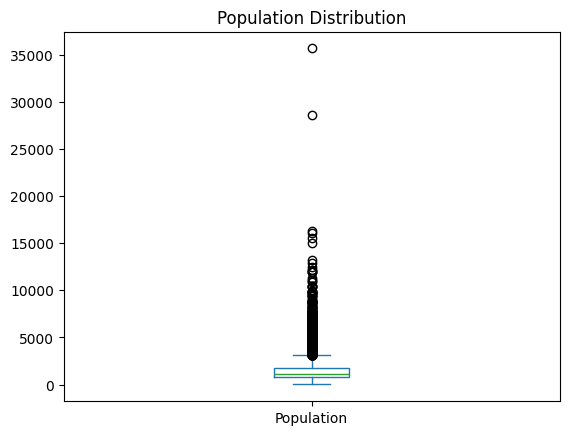

In [60]:
ax = df['Population'].plot(kind='box', title='Population Distribution')
plt.show()

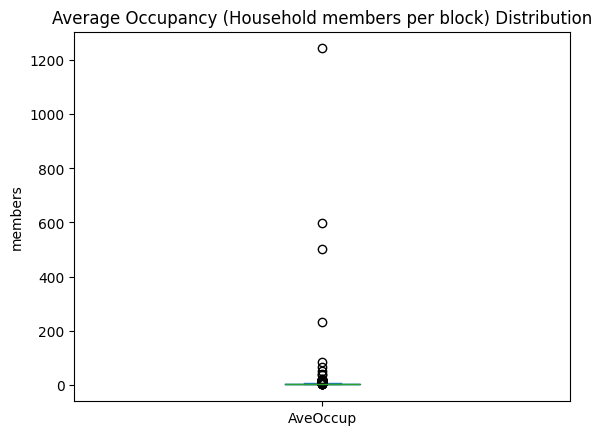

In [62]:
ax = df['AveOccup'].plot(kind='box', title='Average Occupancy (Household members per block) Distribution')
ax.set_ylabel("members")
plt.show()

#### It is indeed a similar story for the last two. While we unfortunately can't visualize the normal distribution for these columns, we can at least take note of the severit/range of the outliers 

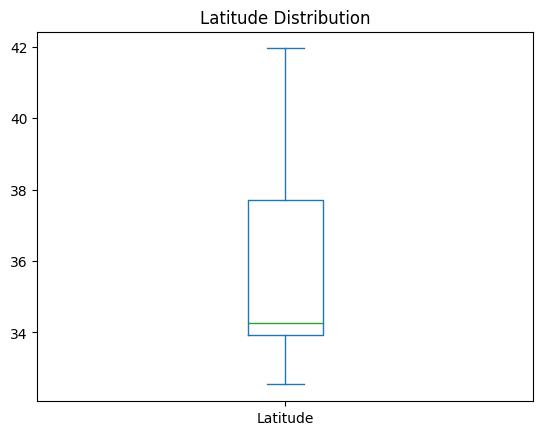

In [63]:
ax = df['Latitude'].plot(kind='box', title='Latitude Distribution')
plt.show()

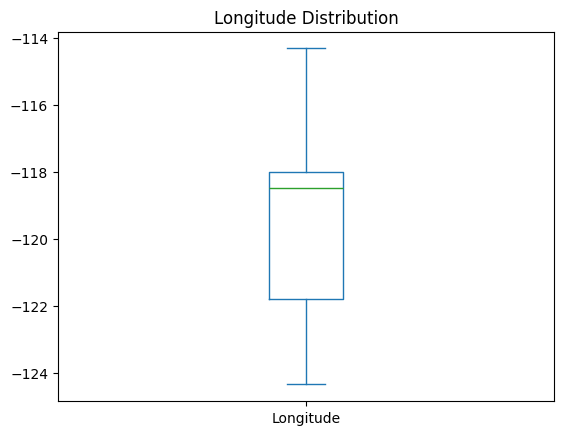

In [64]:
ax = df['Longitude'].plot(kind='box', title='Longitude Distribution')
plt.show()

#### This is what I expected. No outliers, and their stats mirror each other. I suspect a negative correlation once again due to the geography of the California Coast

# D - Correlation Heatmap
- Now to see what's actually correlated and not

In [65]:
df.corr(numeric_only=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


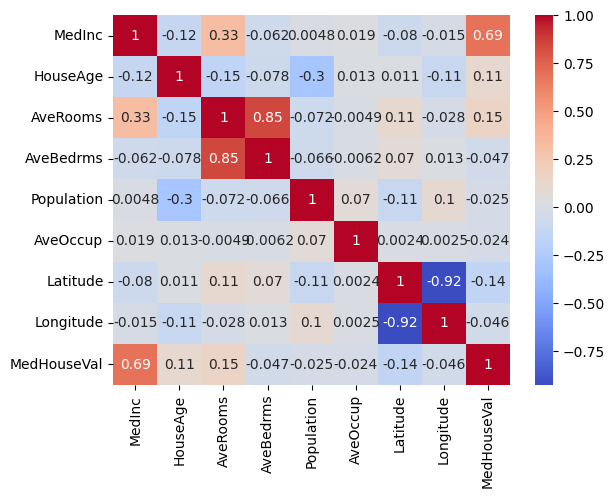

In [67]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### We've got some interesting correlations here
- 0.69 positive between income and house value. This makes sense. People with higher incomes live in more expensive houses per block
- 0.33 positive between rooms and house value as well. This also tracks. More rooms typically mean more expensive
- -0.12 negative between house age and house value. Newer built houses can be slightly more expensive. So far the correlations are making sense
- huge 0.85 positive between rooms and bedrooms. More rooms = more bedrooms according to this map
- -0.92 between latitude and longitude, almost a complete negative correlation. As discussed earlier, this makes sense from the geography of CA

# E - Target-Specific/Feature Relationships
- Will be done via scatterplots

#### I'll plot the ones that had interesting correlations

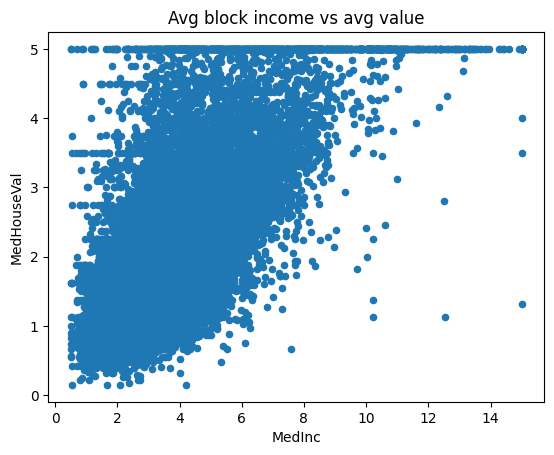

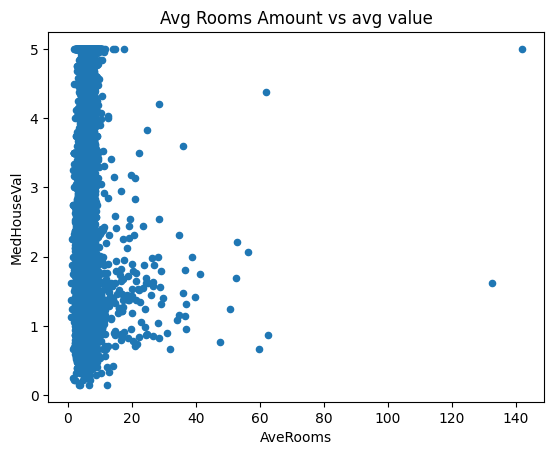

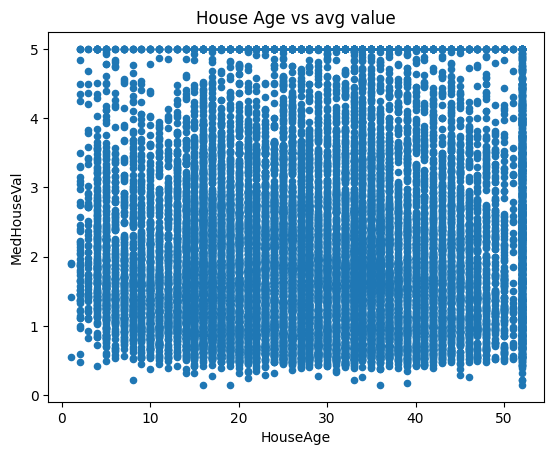

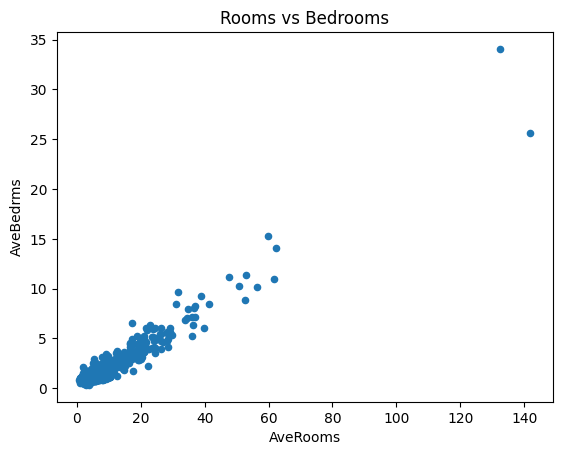

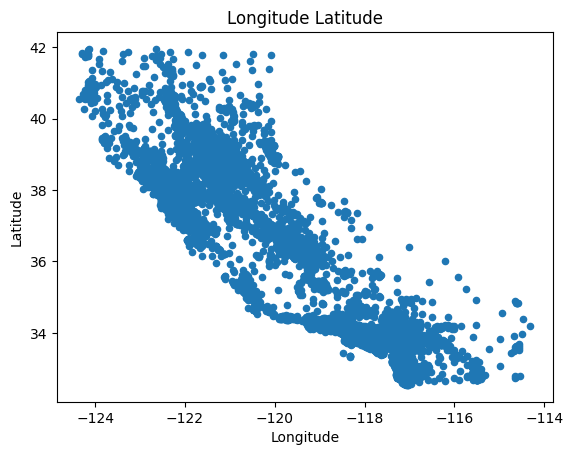

In [74]:
df.plot(kind='scatter', x = 'MedInc', y = 'MedHouseVal', title="Avg block income vs avg value")
df.plot(kind='scatter', x = 'AveRooms', y = 'MedHouseVal', title="Avg Rooms Amount vs avg value")
df.plot(kind='scatter', x = 'HouseAge', y = 'MedHouseVal', title="House Age vs avg value")
df.plot(kind='scatter', x = 'AveRooms', y = 'AveBedrms', title="Rooms vs Bedrooms")
df.plot(kind='scatter', x = 'Longitude', y = 'Latitude', title="Longitude Latitude")
plt.show()

#### Notes:
- Income vs value looks as expected. We once again observe that cap at $500,000
- We see that rooms per block don't necessary correlate to a higher average house cost per block. There are average expensive homes with many different amounts of rooms. However, the outliers do err on the slightly more expensive side
- House age vs value is honestly too messy to gleam anything meaningful, the heatmap provided better info
- Rooms and bedrooms have a clear positive correlation, once again backed by the heatmap. More rooms = more bedrooms on average
- Interestingly enough, the longitude vs latitude scatterplot looks just like California. Honestly, it's really cool.

### Let's see where the most expensive areas are

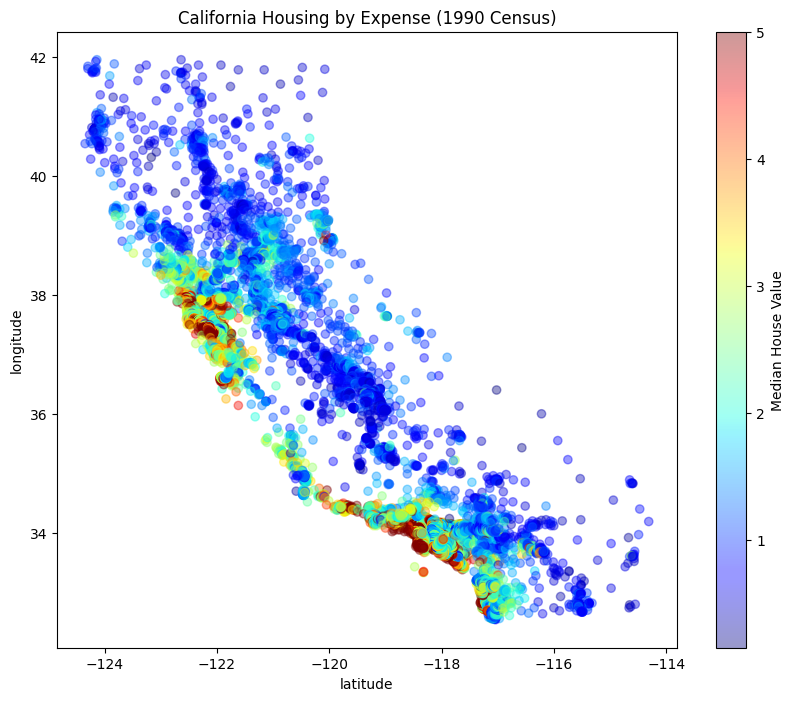

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='jet', alpha=0.4)

plt.colorbar(label='Median House Value')


plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("California Housing by Expense (1990 Census)")
plt.show()

#### Interesting visualization. As onbserved, all the expensive areas are near the coast, especially the farther south you go.

# F - Data Leakage

#### After everything, it does not seem like any leakage is present. The target column (MedHouseVal) seems to be the dependent variable in all of its interactions.